# Exercise 2

In [5]:
from thinkdsp import Signal, Sinusoid, SquareSignal, TriangleSignal, SawtoothSignal, ParabolicSignal
from thinkdsp import normalize, unbias, PI2, decorate
from thinkdsp import Chirp
from thinkdsp import read_wave
from thinkdsp import Spectrum, Wave, UncorrelatedGaussianNoise, Spectrogram
from thinkdsp import Noise

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import thinkstats2

from scipy.stats import linregress

import scipy
import scipy.fftpack

import scipy.signal

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

loglog = dict(xscale='log', yscale='log')

PI2 = np.pi * 2

In [9]:
def plot_gaussian(std):
    M = 32
    gaussian = scipy.signal.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)
    
    plt.subplot(1, 2, 1)
    plt.plot(gaussian)
    decorate(xlabel='Time')

    fft_gaussian = np.fft.fft(gaussian)
    fft_rolled = np.roll(fft_gaussian, M//2)
    
    plt.subplot(1, 2, 2)
    plt.plot(np.abs(fft_rolled))
    decorate(xlabel='Frequency')
    plt.show()

slider = widgets.FloatSlider(min=0.1, max=10, value=2)
interact(plot_gaussian, std=slider);

interactive(children=(FloatSlider(value=2.0, description='std', max=10.0, min=0.1), Output()), _dom_classes=('…

# Exercise 3

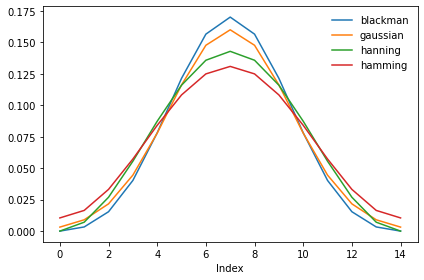

In [15]:
signal = SquareSignal(freq=440)
wave = signal.make_wave(duration=1.0, framerate=44100)

M = 15
std = 2.5

gaussian = scipy.signal.gaussian(M=M, std=std)   
bartlett = np.bartlett(M)
blackman = np.blackman(M)
hamming = np.hamming(M)
hanning = np.hanning(M)

windows = [blackman, gaussian, hanning, hamming]
names = ['blackman', 'gaussian', 'hanning', 'hamming']

for window in windows:
    window /= sum(window)
    
for window, name in zip(windows, names):
    plt.plot(window, label=name)

decorate(xlabel='Index')

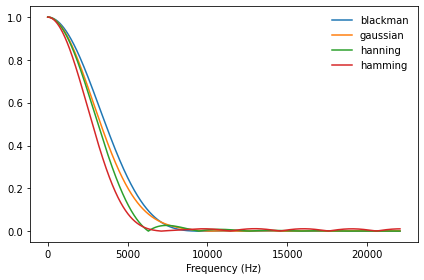

In [16]:
def zero_pad(array, n):
    """Extends an array with zeros.

    array: NumPy array
    n: length of result

    returns: new NumPy array
    """
    res = np.zeros(n)
    res[:len(array)] = array
    return res

def plot_window_dfts(windows, names):
    for window, name in zip(windows, names):
        padded =  zero_pad(window, len(wave))
        dft_window = np.fft.rfft(padded)
        plt.plot(abs(dft_window), label=name)
        
plot_window_dfts(windows, names)
decorate(xlabel='Frequency (Hz)')

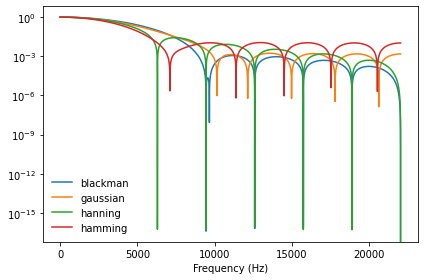

In [17]:
plot_window_dfts(windows, names)
decorate(xlabel='Frequency (Hz)', yscale='log')